# Blueberry Yield Prediction and Exploration

## Approach:

#### 1. Read data
#### 2. Dataset info and description
#### 3. Null values check (missing values) 
#### 4. Feature distribution
#### 5. Outliers (Box-plots)
#### 6. EDA (exploratory data analysis)
#### 7. Splitting data, feature engineering and transformation
#### 8. Transformation pipeline
#### 9. Model development: training and model validation
#### 10. Predcitions and accuracy assessment on new data
#### 11. MLOps strategy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
from pandas.plotting import scatter_matrix
from scipy.stats import norm, skew
from subprocess import check_output


%matplotlib inline
warnings.filterwarnings("ignore")

In [375]:
train_dataset = pd.read_csv("../data/train.csv")
test_dataset = pd.read_csv("../data/test.csv")
initial_df = pd.read_csv("../data/WildBlueberryPollinationSimulationData.csv")

In [376]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [377]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10194 non-null  int64  
 1   clonesize             10194 non-null  float64
 2   honeybee              10194 non-null  float64
 3   bumbles               10194 non-null  float64
 4   andrena               10194 non-null  float64
 5   osmia                 10194 non-null  float64
 6   MaxOfUpperTRange      10194 non-null  float64
 7   MinOfUpperTRange      10194 non-null  float64
 8   AverageOfUpperTRange  10194 non-null  float64
 9   MaxOfLowerTRange      10194 non-null  float64
 10  MinOfLowerTRange      10194 non-null  float64
 11  AverageOfLowerTRange  10194 non-null  float64
 12  RainingDays           10194 non-null  float64
 13  AverageRainingDays    10194 non-null  float64
 14  fruitset              10194 non-null  float64
 15  fruitmass          

In [378]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

Three approaches can be adopted when training and testing the model: 
    
- Use the initial_df that has 18 columns plus the target column
- Use the train data and the test data for training and testing respectively
- Split the train data into test and train and avoid using the test data completely

The dataframes has no null values, from the information above.

In [379]:
initial_df =  initial_df.drop(["Row#"],axis=1).reset_index()
initial_df.set_index('index',inplace=True)

In [380]:
train_dataset.set_index('id',inplace=True)
test_dataset.set_index('id',inplace=True)

In [381]:
initial_df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [382]:
print("Shape of original dataframe: {}".format(initial_df.shape))
print("Shape of test data: {}".format(test_dataset.shape))
print("Shape of the train data: {}".format(train_dataset.shape))

Shape of original dataframe: (777, 17)
Shape of test data: (10194, 16)
Shape of the train data: (15289, 17)


##### The approach I willadopt for this use case is to use the original data frame as id does not have synthetic data (generated data), and I will be able to test the models by having a train data and a test data too.



### Probability plot of the target variable


 mu = 6012.85 and sigma = 1356.08


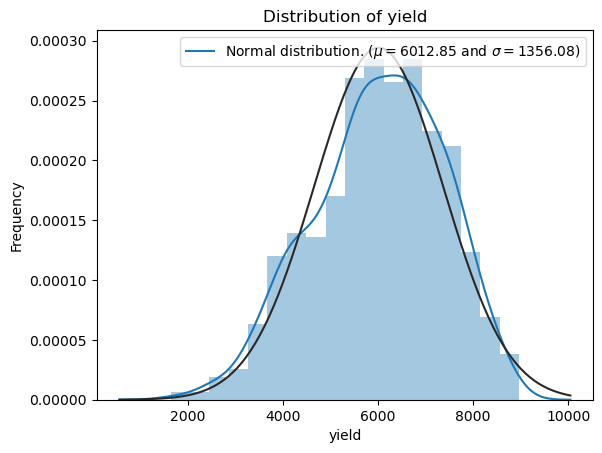

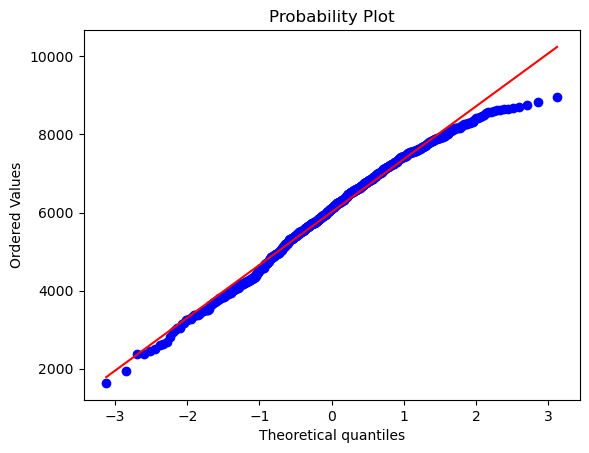

In [383]:
sns.distplot(initial_df['yield'], fit=norm)

mu, sigma = norm.fit(initial_df['yield'])
print('\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

plt.legend(['Normal distribution. ($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu, sigma)], 
          loc='best')

plt.ylabel('Frequency')
plt.title('Distribution of yield')

## Plot also the Q-Q plot
fig = plt.figure()
res = stats.probplot(initial_df['yield'], plot=plt)
plt.show()

The yield target variable follow a normal distribution (Gaussian distribution), as illustrated by the Q-Q plot above.

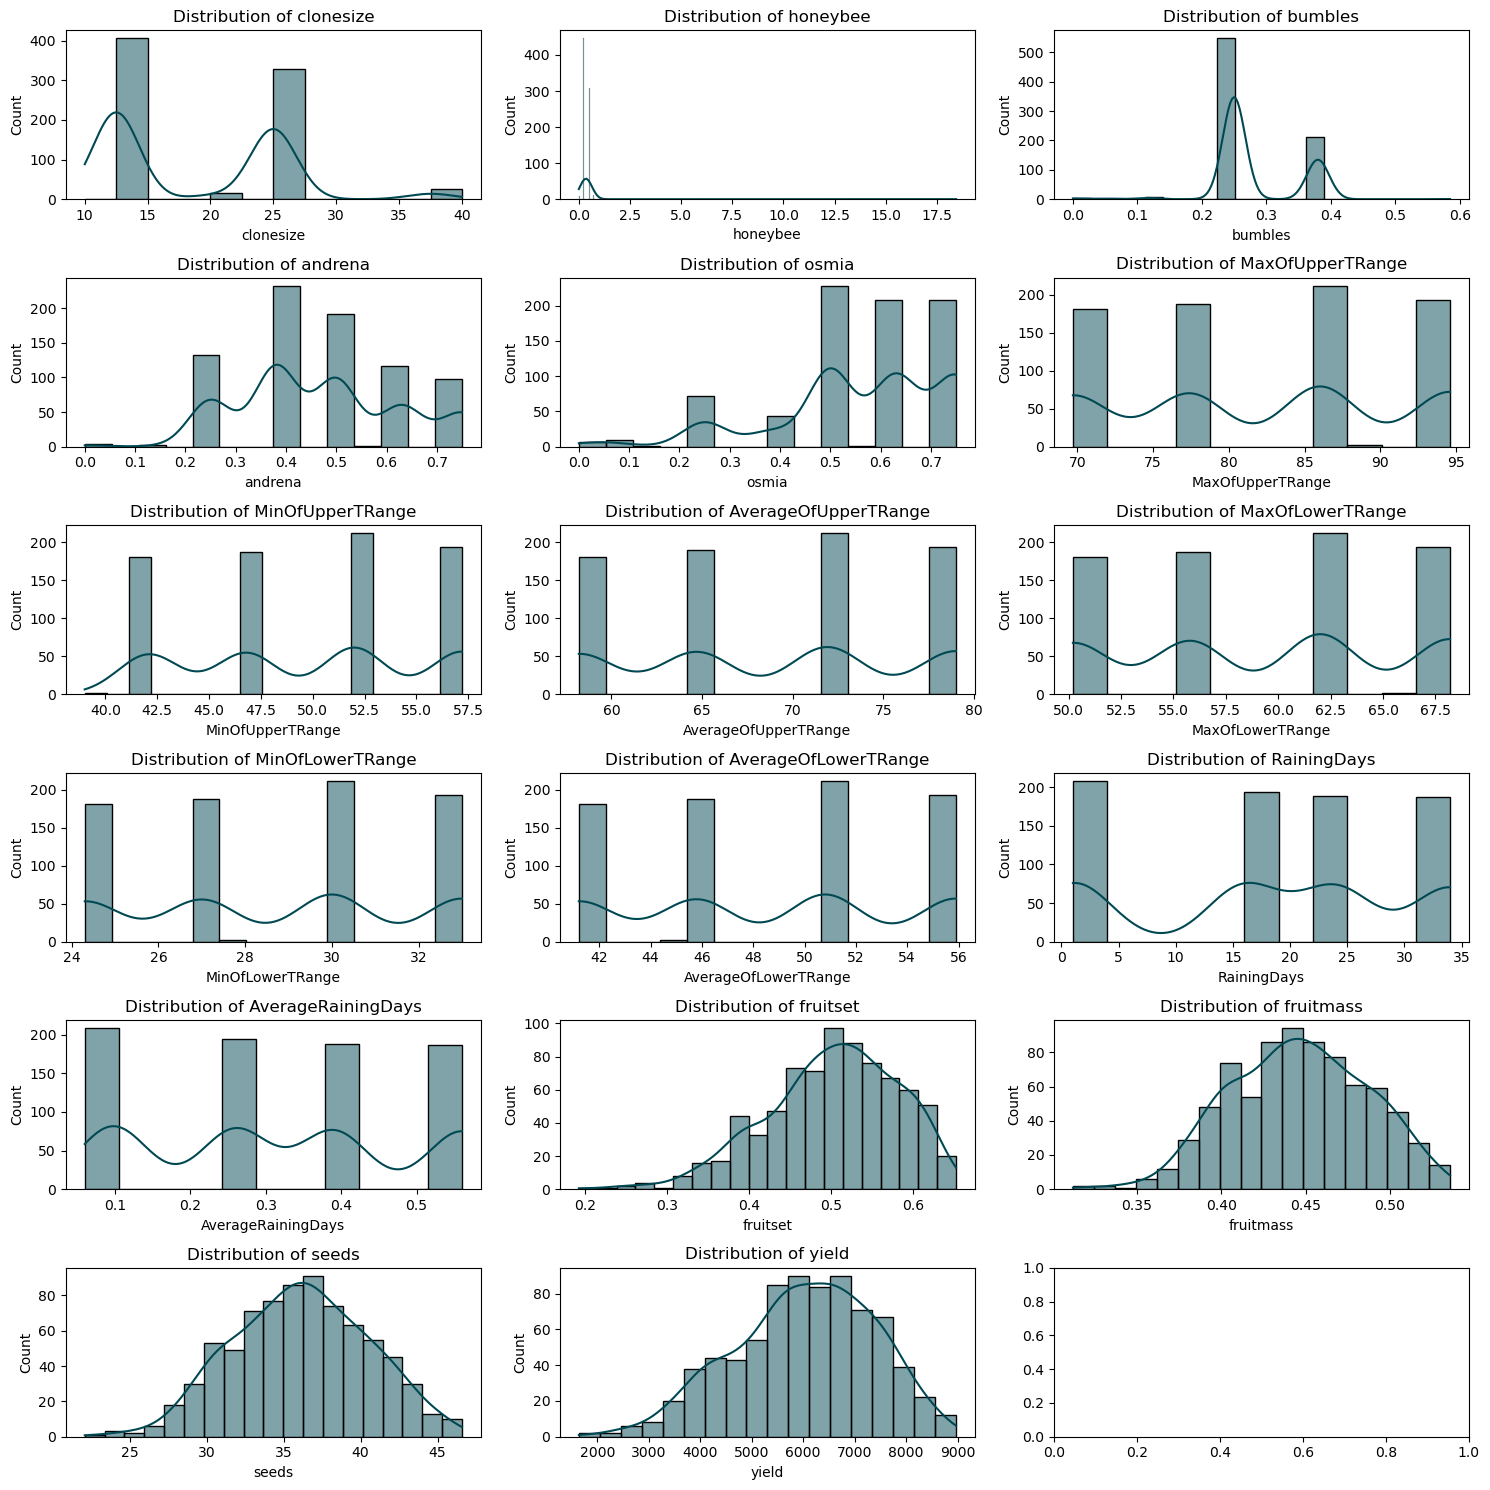

In [384]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)


## Plot the distribution of the columns of the initial dataframe
for i, column in enumerate(initial_df.columns, start = 0):
    ax = axes[i // 3, i % 3] ## get the current axes
    sns.histplot(initial_df[column],ax=ax, kde=True, color="#004953",)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    
plt.tight_layout()
plt.show()

In [385]:
## Add spines to our plots

def add_spines(color="#425169",linewidth=2):
    ax= plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines[['bottom','left','right']].set_color(color)
    ax.spines[['bottom','left','top','right']].set_linewidth(linewidth)
    
## contingency table    
def cross_df(df, col1, col2):
    crossdf = pd.crosstab(df[col1], df[col2], margins=True, margins_name='Total')
    crossdf = crossdf.reset_index()
    return crossdf
    

In [386]:
initial_df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

#### Pairplots and correlation matrix

In [387]:
subset_a = initial_df[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange','yield']]

subset_b = initial_df[['MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield']]


<Figure size 1500x1500 with 0 Axes>

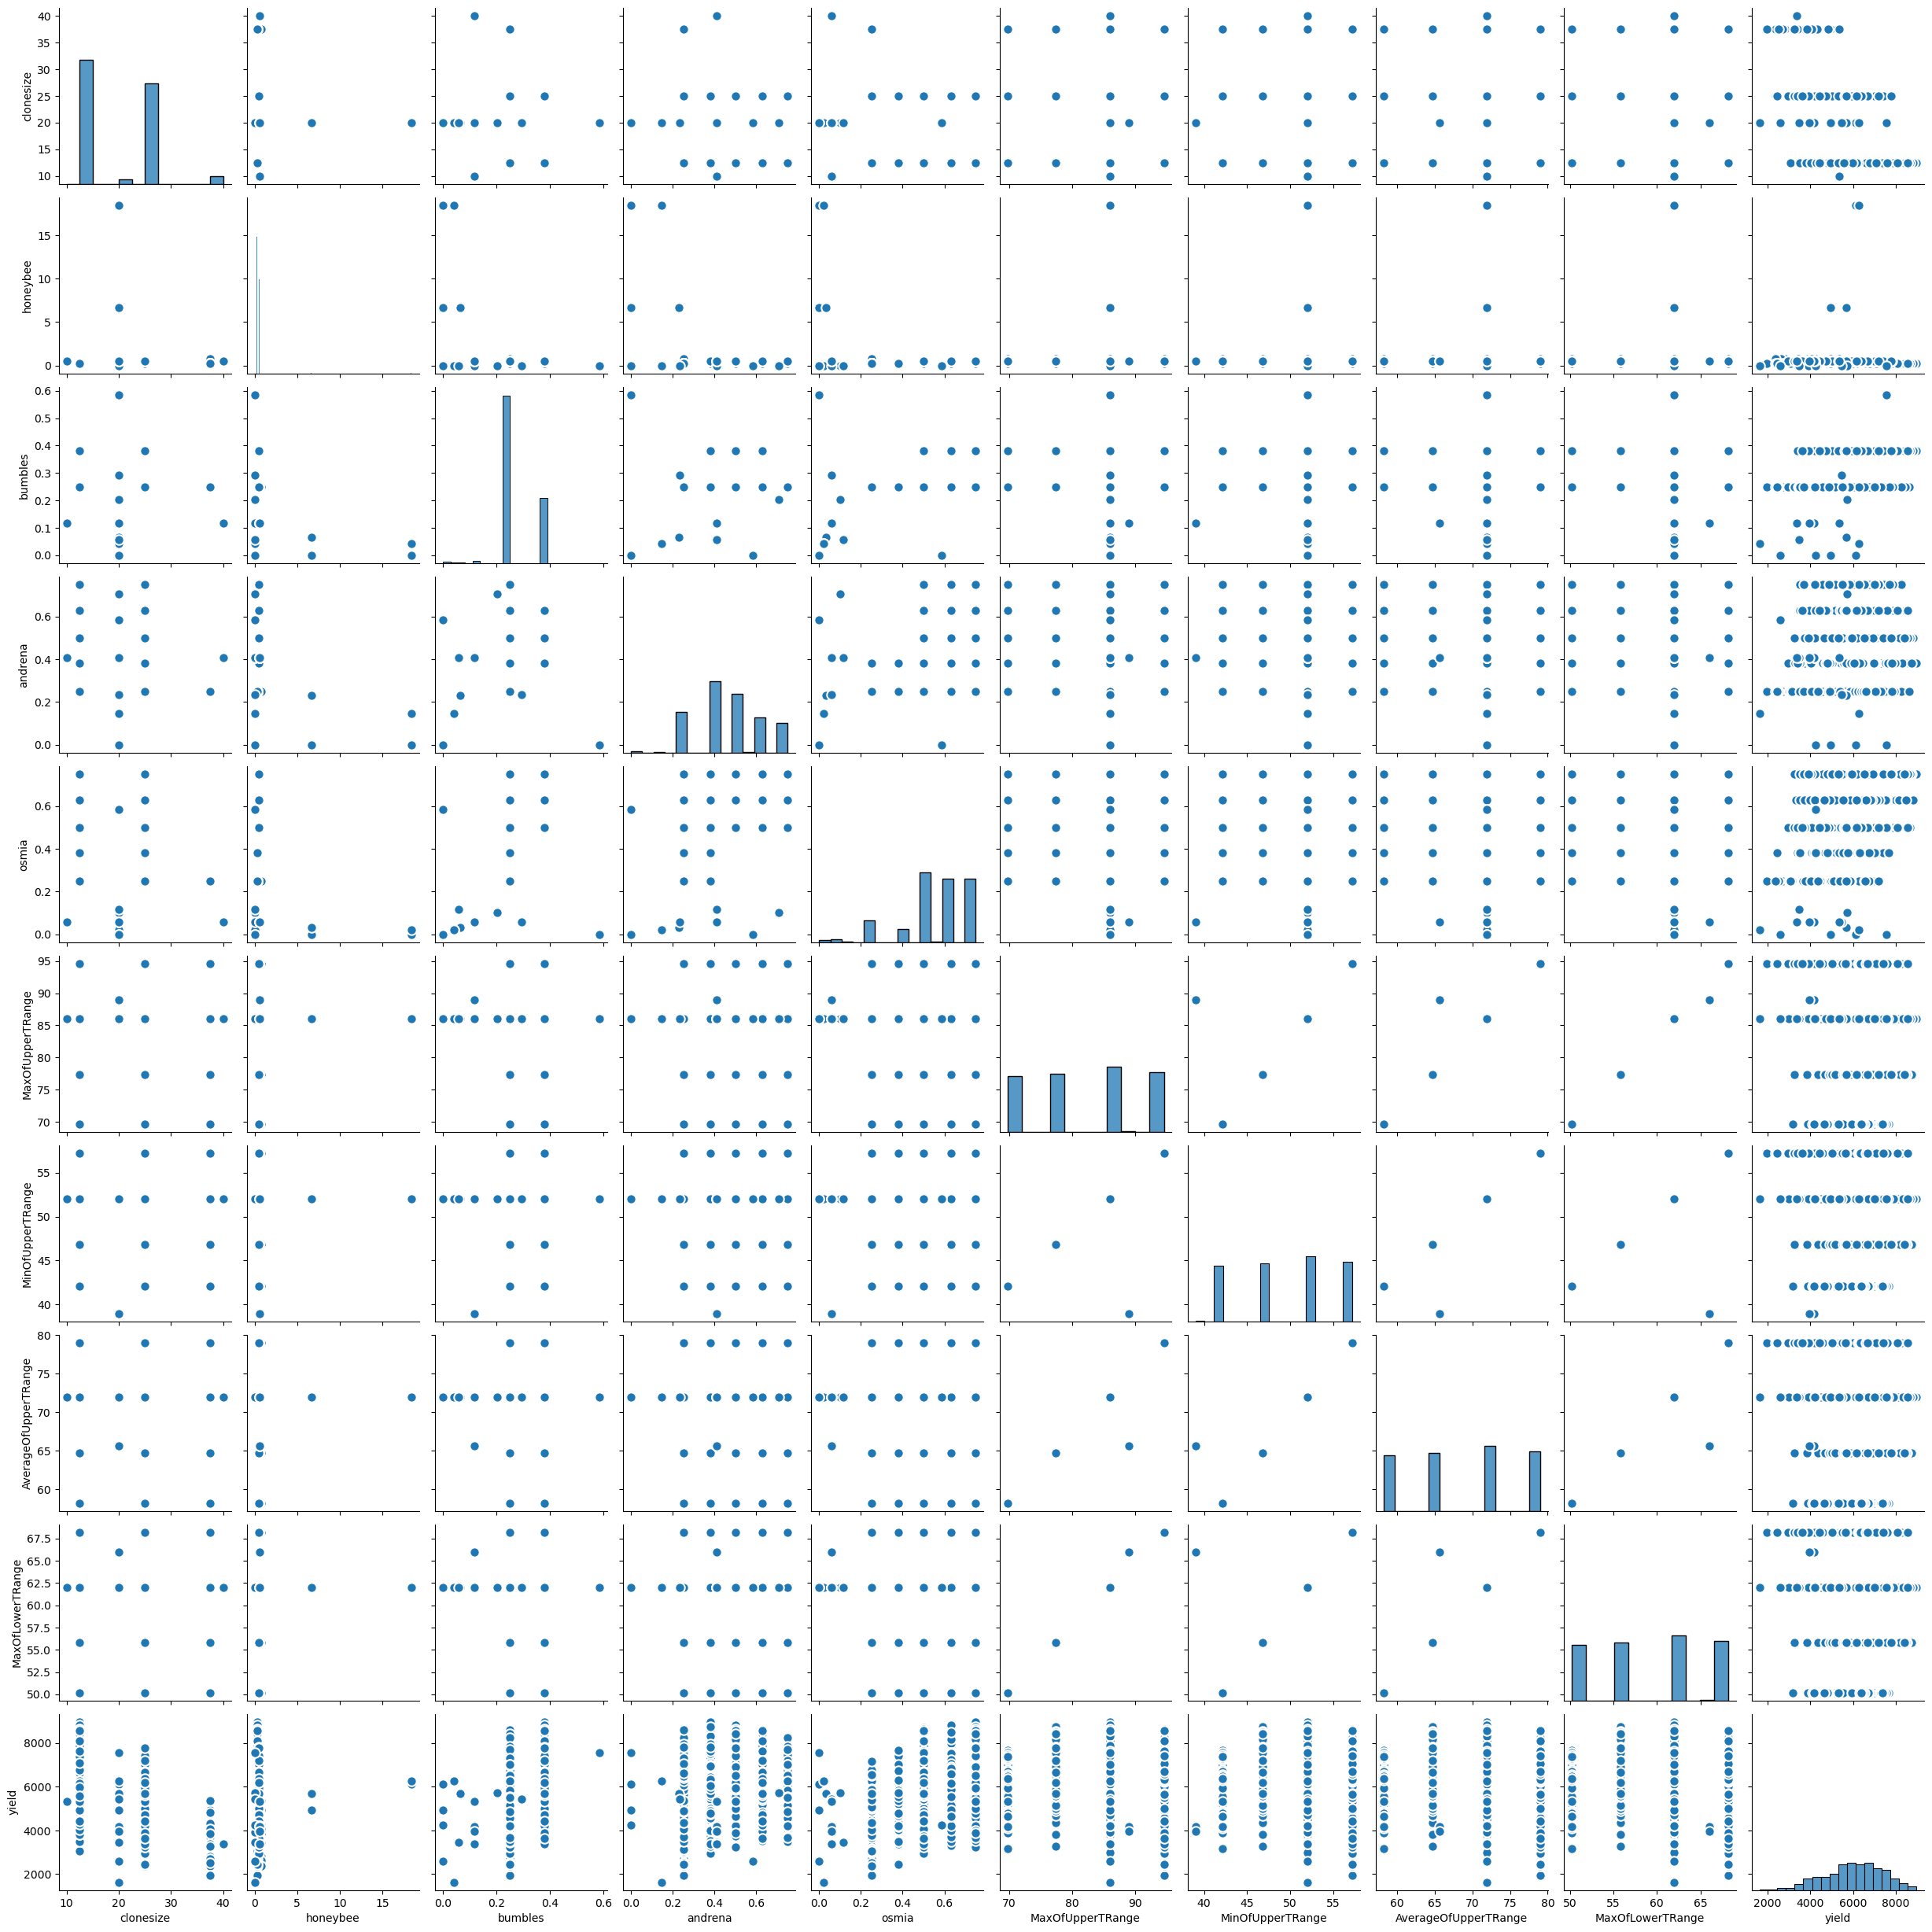

In [388]:
%timeit
plt.figure(figsize=(15,15), dpi=100)
sns.pairplot(subset_a,kind="scatter", plot_kws=dict(s=80, edgecolor="white",linewidth=1.5))
plt.show()

<Figure size 1500x1500 with 0 Axes>

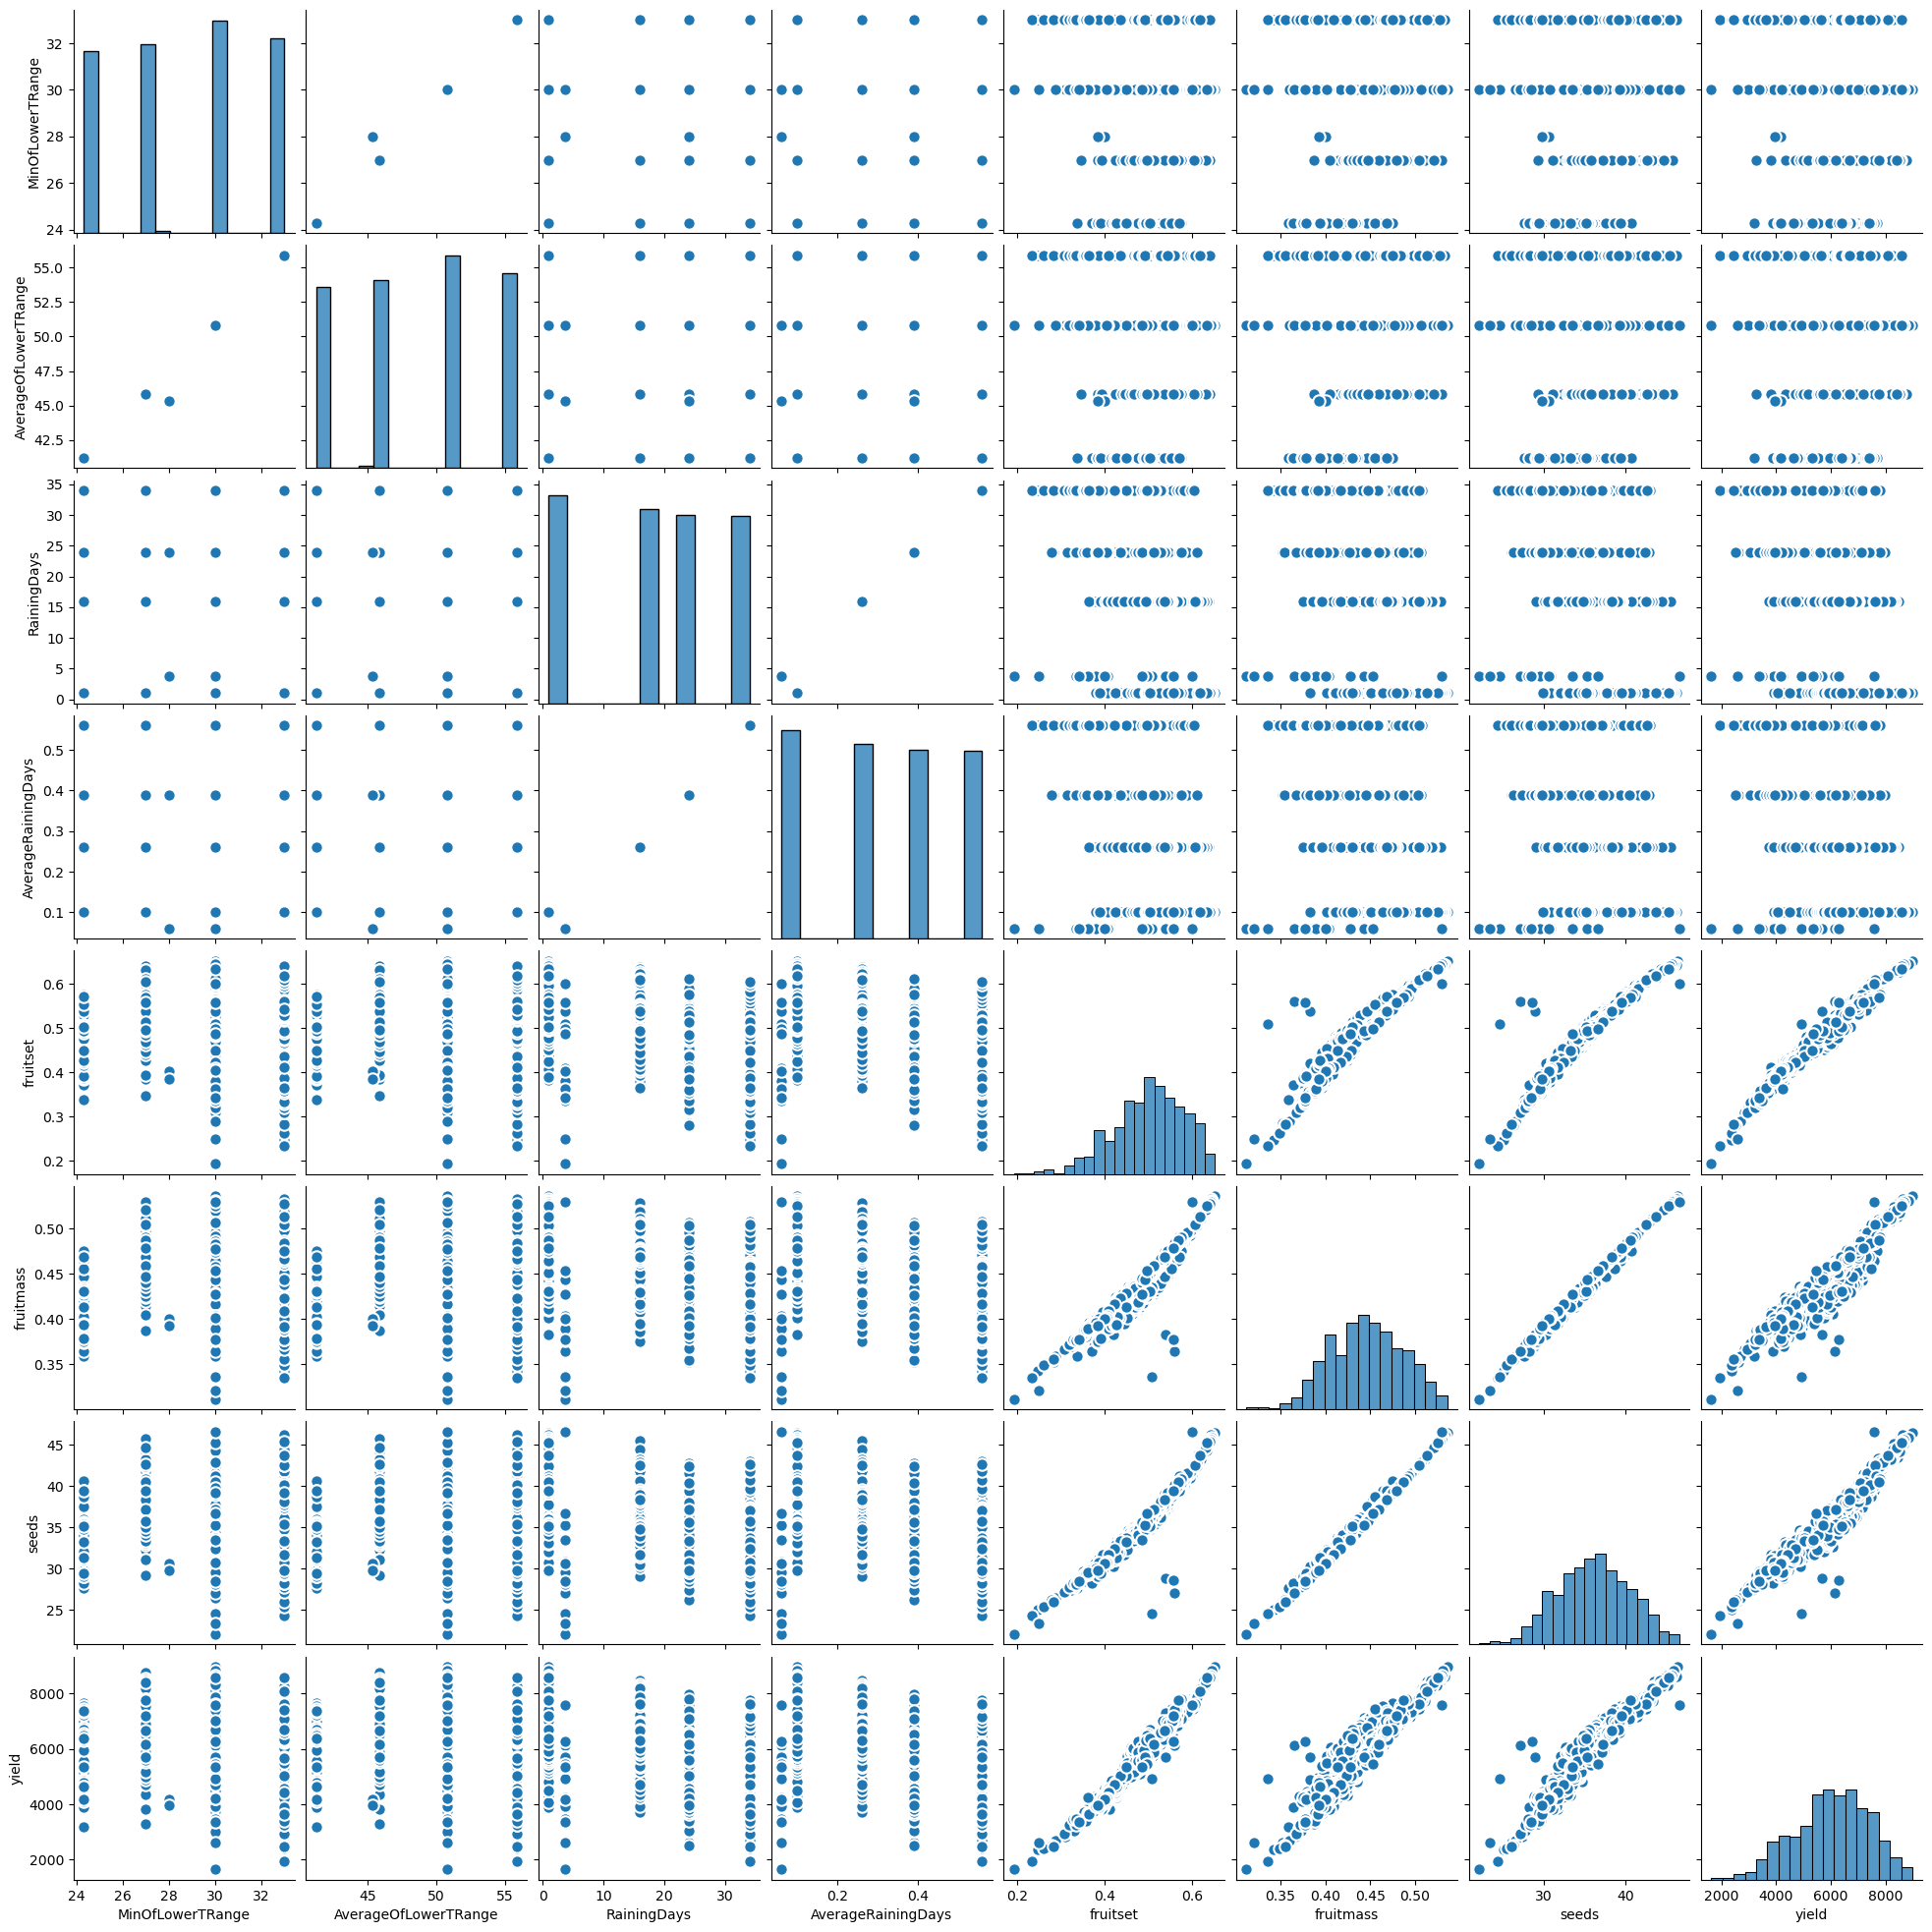

In [389]:
plt.figure(figsize=(15,15), dpi=100)
sns.pairplot(subset_b,kind="scatter", plot_kws=dict(s=80, edgecolor="white",linewidth=1.5))
plt.show()

In [390]:
corr_matrix = initial_df.corr()
corr_matrix["yield"].sort_values(ascending=False)

yield                   1.000000
fruitset                0.984081
seeds                   0.961249
fruitmass               0.930365
osmia                   0.380892
bumbles                 0.309407
andrena                 0.140277
honeybee               -0.044250
MinOfUpperTRange       -0.175883
AverageOfLowerTRange   -0.181293
AverageOfUpperTRange   -0.181774
MinOfLowerTRange       -0.183339
MaxOfUpperTRange       -0.187075
MaxOfLowerTRange       -0.187439
clonesize              -0.516737
RainingDays            -0.540069
AverageRainingDays     -0.541215
Name: yield, dtype: float64

From this correlation matrix we can see that the fruitset, seeds and fruitmass have a very high correlatin with the target 
column ehich is **yield**.

This means that any model can actually predict yield accurately with just three features, and hence it would be a very good
practice to remove these three features from the dataframe when carrying out prediction.

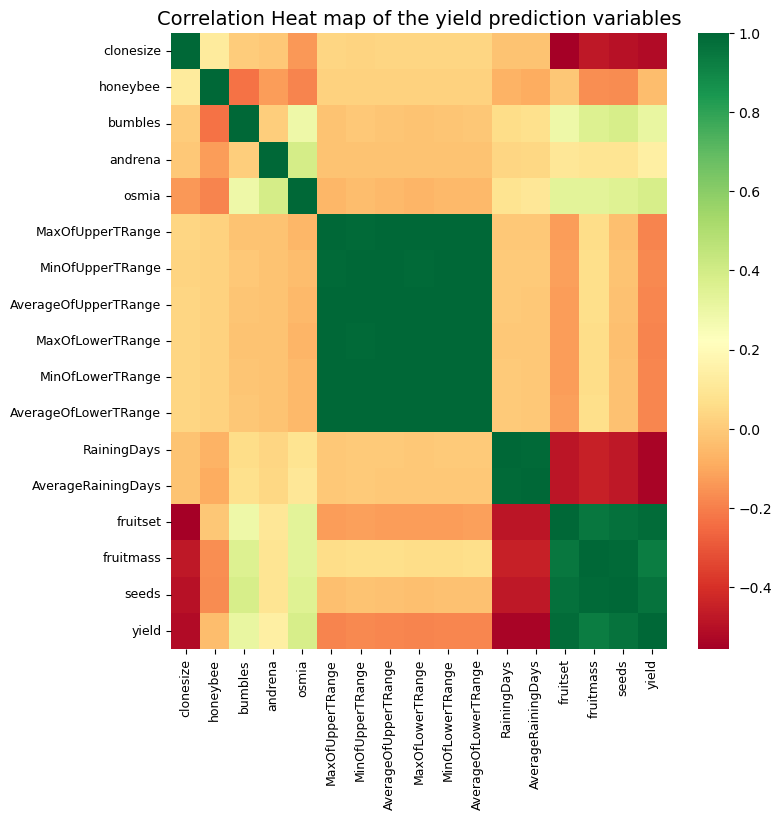

In [391]:
fig, ax = plt.subplots(1, figsize = (8,8))
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns, yticklabels=corr_matrix.columns, cmap="RdYlGn",)
plt.title("Correlation Heat map of the yield prediction variables", fontsize=14)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

##### We can narrow down to see the regression plot of  fruitset, fruitmass and seeds against the yield

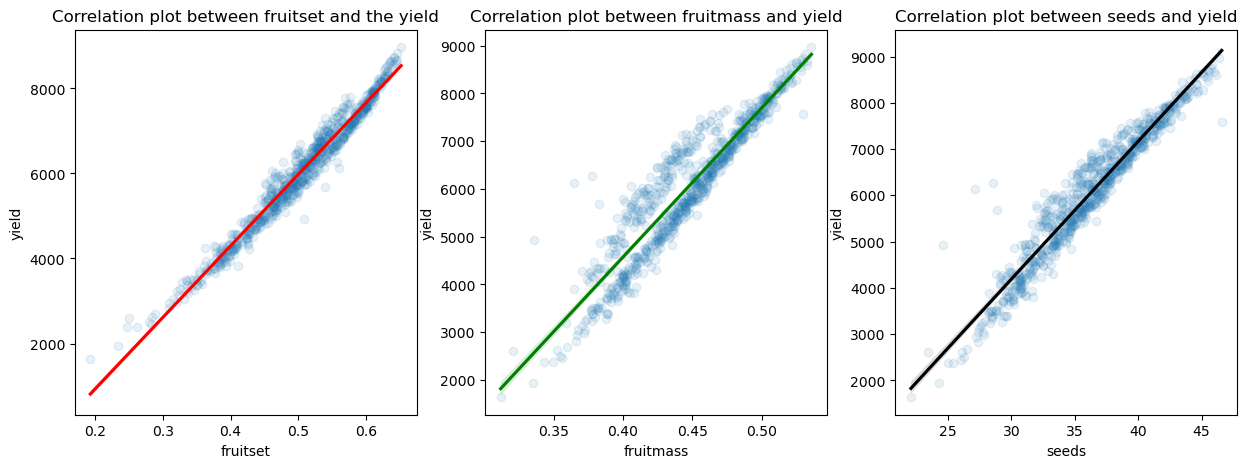

In [392]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.regplot(data=initial_df, x="fruitset",y="yield",ax=ax[0],line_kws={"color":'r'},scatter_kws={"alpha":0.1})
ax[0].set_title("Correlation plot between fruitset and the yield")

sns.regplot(data=initial_df, x="fruitmass",y="yield",ax=ax[1],line_kws={"color":'g'},scatter_kws={"alpha":0.1})
ax[1].set_title("Correlation plot between fruitmass and yield")

sns.regplot(data=initial_df, x = "seeds", y="yield",ax=ax[2], line_kws={"color":'k'},scatter_kws={"alpha":0.1})
ax[2].set_title("Correlation plot between seeds and yield")

plt.show()

Looking into the fruit mass and the yield also reveals that there are two groups from which the data was created from: 

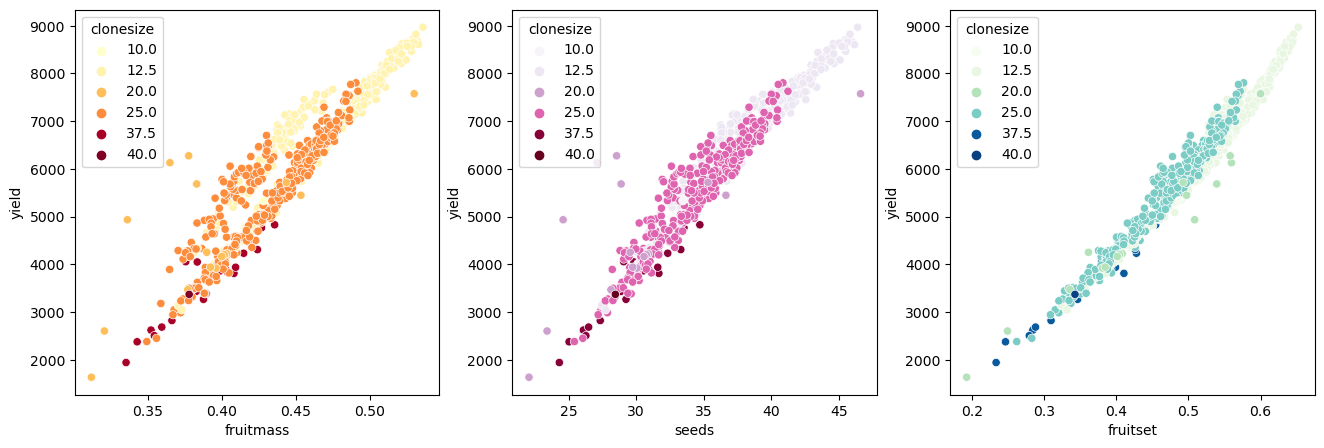

In [393]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.scatterplot(x="fruitmass",y="yield",data=initial_df, hue="clonesize",palette="YlOrRd")
plt.legend(title="clonesize", loc="upper left")

plt.subplot(1,3,2)
sns.scatterplot(data=initial_df, x="seeds",y="yield",hue="clonesize",palette="PuRd")
plt.legend(title="clonesize",loc="upper left")


plt.subplot(1,3,3)
sns.scatterplot(data=initial_df, x="fruitset",y="yield",hue="clonesize",palette="GnBu")
plt.legend(title="clonesize",loc="upper left")
plt.show()

#### Outlier detection and removal

Outliers are values that appear to be different from the other values in the dataset.

This might point to the an error during data entry of faulty measuring device.

The effect of these outliers is that they impact linear models and also affect the weights given to the mean errors such as MAE and RMSE.

In [394]:
## Using standard deviation method for outlier detection

mean = np.mean(initial_df["yield"])
std_dev = np.std(initial_df["yield"])
threshold = 2.5
outliers = []
for dt in initial_df["yield"]:
    if abs(dt - mean) > threshold * std_dev:
        outliers.append(dt)
        
print(outliers)        

[2379.905214, 2508.375673, 1945.530615, 2384.728916, 2452.680747, 1637.704022, 2605.696759]


This method is not so effecient because we cannot be able to support the choice of the threshold selected.

##### Using the Interquantile Range method: (Box-plot)

In [395]:
"""
Any value above the upper bound and below tehe lower bound is considered to be an outlier
"""
def remove_outliers(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - (1.5* iqr)
        upper_bound = q3 + (1.5 * iqr)
        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
        return df

###### Visualizing using box-plots

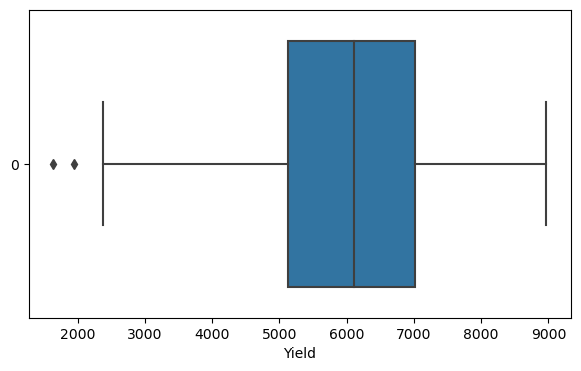

In [400]:
fig,ax = plt.subplots(figsize=(7,4))
sns.boxplot(data=initial_df["yield"],ax=ax,orient="h")
plt.xlabel("Yield")
plt.show()

In [401]:
original_df = remove_outliers(initial_df,["yield"])

## Splitting data into Training and Test set

In [402]:
from sklearn.model_selection import train_test_split

In [403]:
##### Drop the features that have a high correlation:

#original_df = original_df.drop(["fruitset","fruitmass","seeds"],axis=1)
X = original_df.drop(["yield"],axis=1)
Y = original_df[["yield"]]

In [404]:
X.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [405]:
X_train,  X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [406]:
##### Save the X_test and y_test completely 
X_train.to_csv("../data/X_train.csv")
X_test.to_csv("../data/X_test.csv")
y_test.to_csv("../data/y_test.csv")
y_train.to_csv("../data/y_train.csv")

### Transforming the features using a standard scaler

In [407]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV

## how well does the ensembles work
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor

In [408]:
num_columns = list(X_train.columns)

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_columns )
])

In [409]:
X_train = full_pipeline.fit_transform(X_train)

### Training Models and validation of models
    
1. Linear Regression Model
 
    
2. XGBoost Regressor


3. Random Forest Regressor

In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

##### Bias-variance trade-off ?

In [411]:
def baseline_training(X_train, y_train, **kwargs):
    scores = {}
    models = []
    bvd = {}
    r2_scores = []
    train_predictions = {}
    
    if 'lin' in kwargs.keys() and kwargs['lin']:
        lin = LinearRegression()
        lin.fit(X_train, y_train)
        training_lin_pred = lin.predict(X_train)
        lin_mse_train = mean_squared_error(y_train, training_lin_pred)
        rmse_lin_train = np.sqrt(lin_mse_train)
        training_r2 = r2_score(y_train,training_lin_pred)
        lin_mae = mean_absolute_error(y_train, training_lin_pred)
        print("\t\t\t -----Training Metrics of {} \t\t \n\n".format(lin.__class__.__name__))
        print("Linear regression MSE of training is {}".format(lin_mse_train))
        print("Linear regression RMSE of training is {}".format(rmse_lin_train))
        print("R2 Score of linear regression in training {}".format(training_r2))
        print("Mean Abolute Error (MAE) in training {}".format(lin_mae))
        
        scores['lin_training_rmse'] = rmse_lin_train
        models.append(lin)
        train_predictions["linear_regression_predictions"] = training_lin_pred
        
    
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        training_xgb_pred = xgb.predict(X_train)
        mse_xgb_train = mean_squared_error(y_train, training_xgb_pred)
        rmse_xgb_train = np.sqrt(mse_xgb_train)
        r2_xgb_train = r2_score(y_train,training_xgb_pred)
        xgb_mae = mean_absolute_error(y_train, training_xgb_pred)
        print("\t\t\t -----Training Metrics of {} \t\t \n\n".format(xgb.__class__.__name__))
        print("XGBoost regressor MSE of training is {}".format(mse_xgb_train))
        print("XGBoost regressor RMSE of training is {}".format(rmse_xgb_train))
        print("R2 Score of XGBRegressor is {}".format(r2_xgb_train))
        print("Mean Abolute Error (MAE) in training {}".format(xgb_mae))
        
        
        scores['xgb_training_rmse'] = rmse_xgb_train
        models.append(xgb)
        train_predictions["xgboost_predictions"] = training_xgb_pred
        
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train)
        training_rf_pred = rf.predict(X_train)
        mse_rf_train = mean_squared_error(y_train, training_rf_pred)
        rmse_rf_train = np.sqrt(mse_rf_train)
        r2_rf_train = r2_score(y_train,training_rf_pred)
        rf_mae = mean_absolute_error(y_train, training_rf_pred)
        print("\t\t\t -----Training Metrics of {} \t\t \n".format(rf.__class__.__name__))
        print("Random Forest regressor MSE of training is {}".format(mse_rf_train))
        print("Random Forest regressor RMSE of training is {}".format(rmse_rf_train))
        print("R2 score of RandomForest Regressor is {}".format(r2_rf_train))
        print("Mean Abolute Error (MAE) in training {}".format(rf_mae))
        
        scores['random forest training RMSE'] = rmse_rf_train
        models.append(rf)
        train_predictions["random_forest_predictions"] = training_rf_pred
    
    return scores, models, train_predictions   
        

In [412]:
baseline = baseline_training(X_train, y_train, xgb=True, lin=True, rf=True)

			 -----Training Metrics of LinearRegression 		 


Linear regression MSE of training is 14418.16596975964
Linear regression RMSE of training is 120.07566768400515
R2 Score of linear regression in training 0.9917672082771843
Mean Abolute Error (MAE) in training 90.3901340032216
			 -----Training Metrics of XGBRegressor 		 


XGBoost regressor MSE of training is 106.77884515483055
XGBoost regressor RMSE of training is 10.33338498048101
R2 Score of XGBRegressor is 0.9999390291390454
Mean Abolute Error (MAE) in training 7.3694644163810565
			 -----Training Metrics of RandomForestRegressor 		 

Random Forest regressor MSE of training is 3608.0437232463937
Random Forest regressor RMSE of training is 60.066993625837426
R2 score of RandomForest Regressor is 0.9979398022909015
Mean Abolute Error (MAE) in training 43.05609961770947


In [413]:
models_rmse = baseline[0]
models = baseline[1]
predictions = baseline[2]

In [414]:
predictions.keys()

dict_keys(['linear_regression_predictions', 'xgboost_predictions', 'random_forest_predictions'])

In [415]:
linear_reg_pred = predictions["linear_regression_predictions"]
rf_predictions = predictions["random_forest_predictions"]
xgb_preds = predictions["xgboost_predictions"]

### Model Validation Using K-Fold cross validation

A machine learning model can either suffer from underfitting (due to high bias) if the model is too simple for the data or from overfitting (due to high variance)
if the model is too complex for the underlying data.

The scores returned by the models above include a score known as $R^2$ or **coefficient of determination**, which measures how
well a model performs relative to a simple mean of the target values.

$R^2 = 1$ means a perfect fit and $R^2 = 0$ means the model does no better than simply taking the mean of the data.

For high-bias models, the performance of the model on the validation set is similar to the performance on the training set. The training
data is underfit, which  means that the model is a poor predictor both for the training data and for any previously unseen data.

For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set. The training data is overfit,
which means that the model predicts the training data well, but fails for any previously unseen data.


We can use learning curves to understand how our models fit the data, which plots the training and validation curves.

For some intermediate value, the validation curve has a maximum, this level of complexity inidicates a suitable trade-off
between bias and variance

To find an acceptable bias-variance trade-off, we need to evaluate our model, which can help us obtain reliable estimates
of the model's generalization performance, that is, how well the model performs on unseen data.

#### Learning curve behaviour

The general behaviour we would expect from a learning curve: 

- A model of a given complexity, will overfit a small dataset: this means that the training score will be relatively high, while the validation score will be low.

- A model of a given complexity will underfit a large dataset.

- A model will never, except by chance, give a better score to the validation set than the training set; this means the curves should keep getting closer together but never cross.

### Using K-fold cross validation: 

In K-fold cross-validation, we randomly split the training dataset into $k$ folds without replacement, where $k - 1$
folds are used for model training and one fold is used for performance evaluation.


In [416]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

In [417]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 558, Test set:62
Fold:2, Train set: 558, Test set:62
Fold:3, Train set: 558, Test set:62
Fold:4, Train set: 558, Test set:62
Fold:5, Train set: 558, Test set:62
Fold:6, Train set: 558, Test set:62
Fold:7, Train set: 558, Test set:62
Fold:8, Train set: 558, Test set:62
Fold:9, Train set: 558, Test set:62
Fold:10, Train set: 558, Test set:62


In [418]:
def rmse(score):
    rmse = np.mean(np.sqrt(-score))  
    rmse = np.round(rmse,2)
    print("Average RMSE from KFold is {}".format(rmse))

In [419]:
def model_cross_validation(estimator, X_train, y_train):
    reg_score = cross_val_score(estimator, X_train, y_train, cv = kf, scoring= "neg_mean_squared_error")
    print("\t\t ---- Cross Validation for {} -----\n\n".format(estimator.__class__.__name__))
    for i, j in enumerate(reg_score, start = 1):
        rmse_score_k = np.sqrt(-j)
        print("RMSE for fold %d is %.2f" % (i, rmse_score_k))
        
    rmse(reg_score)

In [420]:
lin = baseline[1][0]
model_cross_validation(lin, X_train, y_train)

		 ---- Cross Validation for LinearRegression -----


RMSE for fold 1 is 119.36
RMSE for fold 2 is 113.91
RMSE for fold 3 is 118.74
RMSE for fold 4 is 135.43
RMSE for fold 5 is 123.56
RMSE for fold 6 is 128.62
RMSE for fold 7 is 118.68
RMSE for fold 8 is 146.70
RMSE for fold 9 is 123.48
RMSE for fold 10 is 116.63
Average RMSE from KFold is 124.51


In [421]:
xgboost_reg = baseline[1][1]
model_cross_validation(xgboost_reg, X_train,y_train)

		 ---- Cross Validation for XGBRegressor -----


RMSE for fold 1 is 160.41
RMSE for fold 2 is 141.25
RMSE for fold 3 is 152.10
RMSE for fold 4 is 168.85
RMSE for fold 5 is 167.13
RMSE for fold 6 is 142.83
RMSE for fold 7 is 202.97
RMSE for fold 8 is 142.15
RMSE for fold 9 is 136.79
RMSE for fold 10 is 126.57
Average RMSE from KFold is 154.11


In [422]:
rf_reg = baseline[1][2]
model_cross_validation(rf_reg, X_train, y_train)


		 ---- Cross Validation for RandomForestRegressor -----


RMSE for fold 1 is 179.05
RMSE for fold 2 is 132.01
RMSE for fold 3 is 139.74
RMSE for fold 4 is 145.46
RMSE for fold 5 is 161.16
RMSE for fold 6 is 137.74
RMSE for fold 7 is 215.27
RMSE for fold 8 is 158.96
RMSE for fold 9 is 153.12
RMSE for fold 10 is 146.83
Average RMSE from KFold is 156.93


We can the use learning curves to evaluate whether the models have a high bias (underfitting) or a high variance(overfitting)

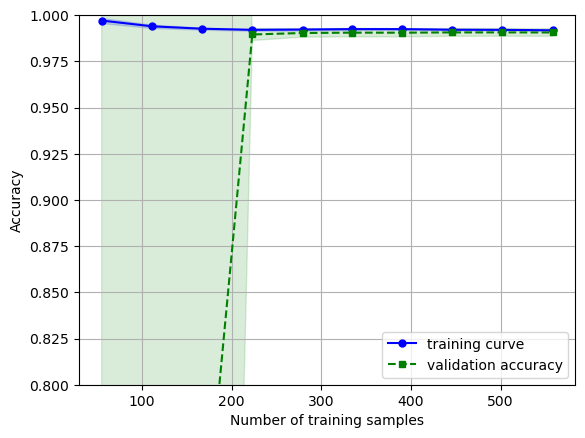

In [423]:
train_sizes, train_scores, test_scores = learning_curve(lin, X_train, y_train, 
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       cv = 10,
                                                       n_jobs=1
                                                      )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis = 1)
plt.plot(train_sizes, train_mean, color='blue', marker= 'o',markersize=5, label='training curve')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color='green',linestyle='--', 
         marker = 's', 
         markersize=5, 
         label = 'validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

#### Residual Plots: 
    
Are used for diagnosing regression models, they can help to detect nonlinearity and outliers, and check whether the erros
are randomly distributed.

In [424]:
def plot_residuals(y_train_pred, y_test_pred, y_train, y_test):
    plt.scatter(y_preds_train, y_preds_train - y_train, c = 'steelblue', marker='o', edgecolor='white',
           label='Training data')



    plt.scatter(y_test_pred, y_test_pred - y_test, c = 'limegreen', marker='s',edgecolor='white',label='Test Data')

    plt.xlabel('Predicted values')
    plt.ylabel('Rediduals')
    plt.legend(loc='upper right')
    plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
    plt.xlim([-10,50])
    plt.show()

If we see patterns in a resudual plot, it means that our model is unable to capture some explanatory information, which 
has leaked into the residuals.

We can also use residual plots to detect outliers which are represented with the large deviation from the centerline.

### Model Tuning with Grid Search VC

In [425]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = [
    {'bootstrap':[False], 'n_estimators':[3, 10, 30], 'max_features':[8, 10,13]},
    {'bootstrap':[True],'n_estimators':[3,10], 'max_features':[10,13]}
]
forest_model = models[2]
grid_search_rf = GridSearchCV(forest_model, param_grid_rf, 
                           cv = 10, scoring = 'neg_mean_squared_error',
                          return_train_score=True)

grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False], 'max_features': [8, 10, 13],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [True], 'max_features': [10, 13],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [426]:
random_forest_best_est = grid_search_rf.best_params_

In [427]:
grid_search_rf.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=30)

In [428]:
results_cv_rf = grid_search_rf.cv_results_
results_cv_rf.keys()
for mean_score, params in zip(results_cv_rf["mean_test_score"], results_cv_rf["params"]):
    print(np.sqrt(-mean_score), params)

170.51898148286412 {'bootstrap': False, 'max_features': 8, 'n_estimators': 3}
164.49221265571532 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
154.65061760642652 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}
180.5797787994187 {'bootstrap': False, 'max_features': 10, 'n_estimators': 3}
162.286914985606 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
156.26782626566245 {'bootstrap': False, 'max_features': 10, 'n_estimators': 30}
186.7840617011073 {'bootstrap': False, 'max_features': 13, 'n_estimators': 3}
169.45353965515017 {'bootstrap': False, 'max_features': 13, 'n_estimators': 10}
168.75786500715134 {'bootstrap': False, 'max_features': 13, 'n_estimators': 30}
191.87226517255223 {'bootstrap': True, 'max_features': 10, 'n_estimators': 3}
160.86598322391413 {'bootstrap': True, 'max_features': 10, 'n_estimators': 10}
175.08273034065633 {'bootstrap': True, 'max_features': 13, 'n_estimators': 3}
160.96624695442148 {'bootstrap': True, 'max_features': 

###### In total, the Grid search has explored 13 combinations of Random Forest

In [429]:
feature_importances = grid_search_rf.best_estimator_.feature_importances_
feature_importances

array([0.00188613, 0.00157852, 0.00107279, 0.00231237, 0.00647692,
       0.004999  , 0.00173104, 0.00373037, 0.00170678, 0.00246678,
       0.00167027, 0.02849449, 0.00194839, 0.57572427, 0.14224773,
       0.22195416])

In [430]:
grid_search_rf

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False], 'max_features': [8, 10, 13],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [True], 'max_features': [10, 13],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [431]:
feature_scores = pd.Series(feature_importances, index = X.columns).sort_values(ascending=False)
feature_scores

fruitset                0.575724
seeds                   0.221954
fruitmass               0.142248
RainingDays             0.028494
osmia                   0.006477
MaxOfUpperTRange        0.004999
AverageOfUpperTRange    0.003730
MinOfLowerTRange        0.002467
andrena                 0.002312
AverageRainingDays      0.001948
clonesize               0.001886
MinOfUpperTRange        0.001731
MaxOfLowerTRange        0.001707
AverageOfLowerTRange    0.001670
honeybee                0.001579
bumbles                 0.001073
dtype: float64

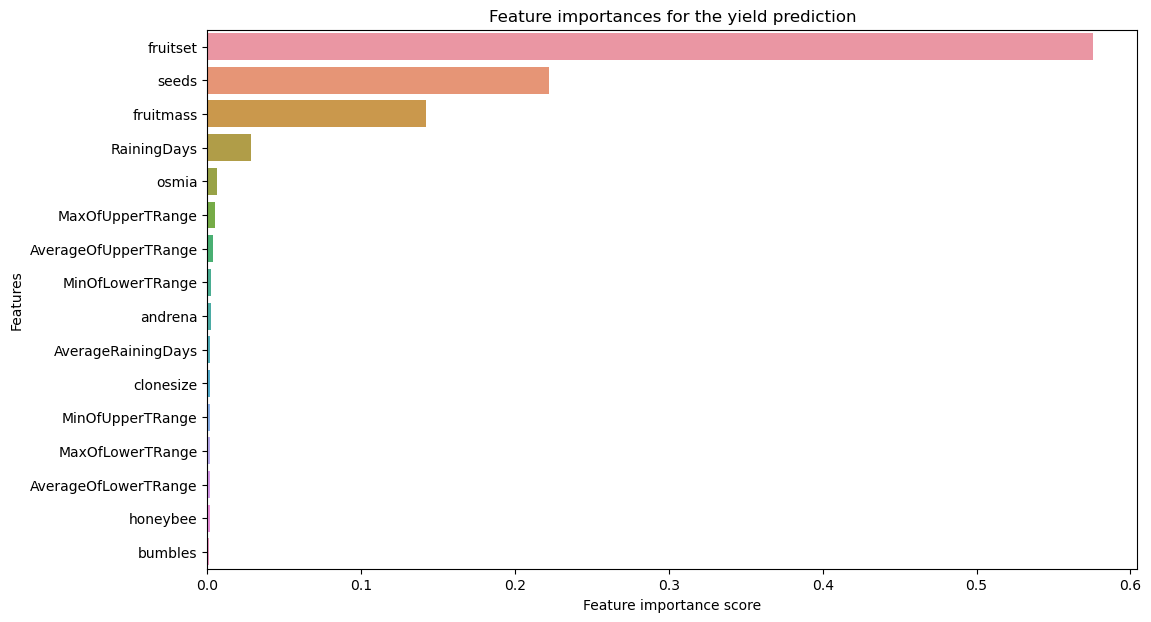

In [432]:
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Feature importances for the yield prediction")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Partial Dependence Plots

Partial Dependence Plots (PDEs) and ICE (Individual Conditional Expectation) plots can be used to visualize and analyze interaction
betwen the target response and a set of input features of interest. 

The PDP can be inteprated as the expected target response as a function of the input features of interest.

In [434]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

In [435]:
saved_X_train = pd.read_csv('../data/X_train.csv')
saved_Y_train = pd.read_csv('../data/y_train.csv')

saved_X_test = pd.read_csv('../data/X_test.csv')
saved_Y_test = pd.read_csv('../data/y_test.csv')

In [436]:
saved_X_train.drop(['index'],axis=1, inplace=True)
saved_Y_train.drop(['index'],axis=1, inplace=True)

saved_X_test.drop(['index'], axis=1, inplace=True)
saved_Y_test.drop(['index'],axis=1, inplace=True)

In [437]:
params = grid_search_rf.best_params_
best_rf = RandomForestRegressor(**params)
best_rf.fit(saved_X_train, saved_Y_train)

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=30)

In [438]:
saved_X_train = full_pipeline.fit_transform(saved_X_train)

In [439]:
saved_X_train = pd.DataFrame(data=saved_X_train,columns = X.columns )

In [440]:
saved_X_test = full_pipeline.fit_transform(saved_X_test)

In [441]:
saved_X_test = pd.DataFrame(data=saved_X_test, columns = X.columns)

In [442]:
best_rf.fit(saved_X_train, saved_Y_train)

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=30)

In [443]:
len(list(saved_X_train.columns))

16

##### Plot the partial dependence plots: 

In [1]:
n_rows = 8
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(8,16),sharey=True)
for i, x in enumerate(saved_X_train.columns):
    raw_values = partial_dependence(best_rf, saved_X_train, i, kind='average')
    loc = i//n_cols, i%n_cols
    sns.lineplot(x = raw_values['values'][0],
                 y=raw_values['average'][0], ax=ax[loc],
                style=0, markers=True, legend=False)
    ax[loc].set_xlabel(x)
    if i%n_cols==0:
        ax[loc].set_ylabel('Yield')
fig.suptitle('Partial dependence plots',va='top', ha='center')
fig.tight_layout()
fig.subplots_adjust(hspace=0.6,wspace=0.1)

NameError: name 'plt' is not defined

From the Partial Dependence Plots (PDPs), we can see the response of the target variable with respect to the independent variables.

- averageRainingDays and rainingDays increasing leads to a decrease in the yield

- increased presence of osmia, andrena and bumbles in the field increases the yield

##### Predictions using random forest regressor

In [446]:
X_test = full_pipeline.fit_transform(X_test)

In [447]:
preds_rf = best_rf.predict(X_test)
mse = mean_squared_error(y_test,preds_rf)
rmse = np.sqrt(mse)
print("----- RMSE of Random Forest Regressor:----- \n\n\t", rmse)

----- RMSE of Random Forest Regressor:----- 

	 225.43266606071415


In [448]:
r2 = r2_score(y_test, preds_rf)
print("------ R2 Score of Random Forest Regressor ------\n\n\t",r2)

------ R2 Score of Random Forest Regressor ------

	 0.9739858707263076



### Training using XGBoost native API 

#### Grid search CV for XGBoost

In [450]:
params_xgb = [
    {'max_depth':[2,3,10],'n_estimators':[50,100],'learning_rate':[0.1, 0.2,0.6]}
]

xgb_model = models[1]

grid_search_xgb = GridSearchCV(xgb_model, params_xgb, 
                           cv = 20, scoring = 'neg_mean_squared_error',
                          return_train_score=True)

grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=20,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'learning_rate': [0.1, 0.2, 0.6],
                          'max_depth': [2, 3, 10], 'n_estimators': [50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [451]:
np.sqrt(-grid_search_xgb.best_score_)

138.53744440639508

In [452]:
results_cv_xgb = grid_search_xgb.cv_results_
for mean_score,params in zip(results_cv_xgb["mean_test_score"],results_cv_xgb["params"]):
    print(np.sqrt(-mean_score),params)

172.33150251829704 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
147.54236283156047 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
150.10564815333103 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
139.19480520654886 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
152.4182594799427 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
151.7973036503161 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
153.21651668260225 {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50}
143.793508679664 {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
140.85460207203238 {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
138.53744440639508 {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
151.5828106807084 {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 50}
151.68697036476965 {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}
157.9216370722993 {'learning_rate': 0.6, 'max_depth': 2, 'n

In [453]:
best_xgb = grid_search_xgb.best_estimator_

In [454]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [455]:
xgb_preds = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, xgb_preds)
rmse = np.sqrt(mse)
print("---- RMSE of XGBoost Regressor ---", rmse)

---- RMSE of XGBoost Regressor --- 284.6499470960884


##### Our best performing model here is the RandomForest Regressor with an RMSE of 225.43 and r2 score of 0.97